# [Where Will the Sorting Hat Put You?](https://thefiddler.substack.com/p/where-will-the-sorting-hat-put-you)
## November 8 2024

## Problem

_You are waiting in line to be sorted into one of the four houses of Logwarts (a posh wizarding boarding school in the Scottish highlands) by an anthropomorphic sorting hat. The hat is a bit of a snob about the whole matter, and refuses to sort two students in a row into the same house. If a student requests a certain house, but the previously sorted student was already sorted into that same house, then the hat chooses randomly from among the three remaining houses. Otherwise, the hat grants the student’s request._

_You are standing 10th in line, and you make plans to request Graphindor house for yourself. As for the other students in line, you can assume that they have random preferences from among the four houses._

_The first student steps up, and has a brief, quiet conversation with the hat. After a few moments, the hat proclaims, “Graphindor!”_

_At this point, what is the probability that you will be sorted into Graphindor?_

## Solution

This is a pretty classic example of a markov chain. If we wanted a way of finding the probability of the ith student being sorted into a certain house, we can first observe that the probability of ending up in a given house for the second student is

$$ T \cdot v_1 = v_2 $$

where $T$ is the transition matrix below and $v_1$ is the initial vector $ (1,0,0,0) $ (the first index of $ v_i $ is the probability of the student being placed in 'Graphindor').

$$
T = 
\begin{pmatrix}
0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & 0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & 0 & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0 & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0
\end{pmatrix}
$$

We can then find the probability of the third student being sorted into a certain house by multiplying the transition matrix by the vector $v_2$:

$$ T \cdot v_2 = T^2 \cdot v_1 = v_3 $$

We can proceed this way until we get to the student immediately before you $ v_9 $. As long as they don't get sorted into 'Graphindor', the probability of you getting sorted into 'Graphindor' is $ v_{10} = 1- v_9 $.

We can proceed in this way but to simplify a little I examined how the first index of $ v $ changes and found the following pattern:

$$ v_{G_1} = 1 $$
$$ v_{G_2} = 0 $$
$$ v_{G_3} = \frac{1}{3} $$
$$ v_{G_4} = \frac{1}{3} - \frac{1}{9} $$
$$ v_{G_5} = \frac{1}{3} - \frac{1}{9} + \frac{1}{27}$$
$$ v_{G_6} = \frac{1}{3} - \frac{1}{9} + \frac{1}{27} - \frac{1}{81}$$

Ignoring those first two terms, we can write this as:

$$ v_{G_n} = \sum_{j=3}^{n} (-1)^{j+1} \left( \frac{1}{3} \right)^{j-2} $$

So the probability of you ended up in 'Graphindor' is:

$$ v_{G_{10}} = 1 - v_{G_9} = 1 - \sum_{j=3}^{9} (-1)^{j+1} \left( \frac{1}{3} \right)^{j-2} $$

In [ ]:
import sympy as sp

def probability_graphindor(N):
    if N == 1:
        return 1
    elif N == 2:
        return 0
    
    total = 0
    for i in range(3,N):
        total += (-1)**(i-1) * sp.Rational(1,3)**(i-2)
    return 1-total

N = 10
result = probability_graphindor(N)
print("Probability of graphindor for student {N}: {x} \u2248 {y}".format(N=N, x=result, y=result.evalf()))

Probability of graphindor for student 10: 1640/2187 ≈ 0.749885688157293


## Extra Credit 

_Suppose the answer to this week’s Fiddler is p._

_Now, instead of being 10th in line, suppose you are Nth in line, where N is some value much greater than 10. Because so many students are being sorted in front of you, you decide you’ll take a nap. You wake up without any idea of how long you were out—it could have been a second, or it could have been an hour, you’re just not sure. It’s still not your turn to be sorted yet, but you see a student wearing the hat. After a brief moment, the hat shouts, “Graphindor!”_

_What is the smallest value of N such that your probability of being sorted into Graphindor is greater than p?_

_(To be clear, when you wake up, the student being sorted is anywhere from first in line to immediately before you in line with equal probability.)_

## Solution

Now we need to evaluate the average probability of being sorted into 'Graphindor' for each possibility where the are 1 to $N$ students in front of us. In this situation, let's call the person that just got sorted into 'Graphindor' after you woke up the $i=1$ th student. The probability of you being sorted into 'Graphindor' is:

$$ p_N = \frac{1}{N} \sum_{i=1}^{N} 1-v_{G_i}$$

and $ v_{G_i} $ is the same as above. We can then find the smallest value of $N$ such that $ p_N > p $. It's worth noting that as formulated above, the actual number would be N+1 since we are counting the number of students in front of us.

We can also notice that our current formulation involved a nested loop which makes that computation $ O(N^2) $. After attempting to impliment it naively and realizing that the answer a pretty large number ( $> 100$ ), it made sense to rearrange for a more efficient computation. We can rewrite the probability as (now $ O(N) $):

$$
p_N = 1 - \frac{1}{N} \left( 1 + \sum_{i=3}^{N} (-1)^{i+1} \left(\frac{1}{3}\right)^{i-2} (N - i + 1) \right)
$$

In [171]:
def v_i(i):
    if i == 1:
        return 1
    elif i == 2:
        return 0
    # print([(-1)**(j+1) * (1/3)**(j-2) for j in range(3,i+1)])
    return sum([(-1)**(j+1) * (1/3)**(j-2) for j in range(3,i+1)])

def probability_graphindor(N):
    s = []
    if N >= 1:
        s+=[1]
    if N >= 2:
        s+=[0]
    if N >= 3:
        s += [(-1)**(i+1) * (1/3)**(i-2) * (N-i+1) for i in range(3,N+1)]
    return 1 - 1/N * sum(s)

def probability_graphindor_exact(N):
    s = []
    if N >= 1:
        s+=[1]
    if N >= 2:
        s+=[0]
    if N >= 3:
        s += [(-1)**(i+1) * sp.Rational(1,3)**(i-2) * (N-i+1) for i in range(3,N+1)]
    return 1 - sp.Rational(1,N) * sum(s)

In [175]:
# Verify the formula
for N in range(1,15):
    ans1 = probability_graphindor(N)
    ans2 = (1/N)*sum([1-v_i(i) for i in range(1,N+1)])
    # print("N={N}: {x} = {y}".format(N=N, x=ans1, y=ans2))
    assert abs(ans1 - ans2) < 1e-10

We can eliminate the outer summation as well. The details are omitted here but the final formula is:

$$
p_N = 1 - \frac{1}{N} \left[ 1 - (N-1) \cdot \frac{r(1 - r^{N-2})}{1 - r} + \frac{r \cdot \left(1 - r^{N-2}(1 + (N-2)(1 - r))\right)}{(1 - r)^2} \right]
$$

$$
r = -\frac{1}{3}
$$

After running it, I found it didn't really improve efficiency much. However, this does allow us to relatively easily get $ N $ as a function of $ p $ and then we can find the smallest integer $ N $ such that $ p_N > p $.

$$ N = \frac{1+A+B}{1-p+A}

In [198]:
def probability_graphindor_simple(N):
    if N < 1:
        return 0
    
    r = -1 / 3 

    if N > 2:
        A = (r * (1 - r**(N-2))) / (1 - r)
    else:
        A = 0

    if N > 2:
        B = (r * (1 - r**(N-2) * (1 + (N-2) * (1 - r)))) / ((1 - r)**2)
    else:
        B = 0

    sum_s = 1 - (N - 1) * A + B
    probability = 1 - (1 / N) * sum_s

    return probability

def probability_graphindor_simple_exact(N):
    if N < 1:
        return 0
    
    r = -1*sp.Rational(1,3) 

    if N > 2:
        A = (r * (1 - r**(N-2))) / (1 - r)
    else:
        A = 0

    if N > 2:
        B = (r * (1 - r**(N-2) * (1 + (N-2) * (1 - r)))) / ((1 - r)**2)
    else:
        B = 0

    sum_s = 1 - (N - 1) * A + B
    probability = 1 - sp.Rational(1,N) * sum_s

    return probability

def N_given_probability_graphindor(probability):
    if N < 1:
        return 0
    
    r = -1*sp.Rational(1,3) 

    if N > 2:
        A = (r * (1 - r**(N-2))) / (1 - r)
    else:
        A = 0

    if N > 2:
        B = (r * (1 - r**(N-2) * (1 + (N-2) * (1 - r)))) / ((1 - r)**2)
    else:
        B = 0
    
    return (1+A+B)/(1-probability+A)

In [222]:
# Verify the formula
for N in range(4900,4925):
    ans1 = probability_graphindor(N)
    ans2 = probability_graphindor_simple_exact(N)
    # print("N={N}: {x} = {y}".format(N=N, x=ans1, y=ans2))
    print("N={N}: {x}: N \u2248 {recal_N}".format(N=N, x=ans2.evalf(), recal_N=N_given_probability_graphindor(ans2)))
    assert abs(ans1 - ans2) < 1e-10
print(sp.Rational(1640,2187).evalf())

N=4900: 0.749885204081633: N ≈ 4900
N=4901: 0.749885227504591: N ≈ 4901
N=4902: 0.749885250917993: N ≈ 4902
N=4903: 0.749885274321844: N ≈ 4903
N=4904: 0.749885297716150: N ≈ 4904
N=4905: 0.749885321100917: N ≈ 4905
N=4906: 0.749885344476152: N ≈ 4906
N=4907: 0.749885367841859: N ≈ 4907
N=4908: 0.749885391198044: N ≈ 4908
N=4909: 0.749885414544714: N ≈ 4909
N=4910: 0.749885437881874: N ≈ 4910
N=4911: 0.749885461209530: N ≈ 4911
N=4912: 0.749885484527687: N ≈ 4912
N=4913: 0.749885507836353: N ≈ 4913
N=4914: 0.749885531135531: N ≈ 4914
N=4915: 0.749885554425229: N ≈ 4915
N=4916: 0.749885577705452: N ≈ 4916
N=4917: 0.749885600976205: N ≈ 4917
N=4918: 0.749885624237495: N ≈ 4918
N=4919: 0.749885647489327: N ≈ 4919
N=4920: 0.749885670731707: N ≈ 4920
N=4921: 0.749885693964641: N ≈ 4921
N=4922: 0.749885717188135: N ≈ 4922
N=4923: 0.749885740402194: N ≈ 4923
N=4924: 0.749885763606824: N ≈ 4924
0.749885688157293


In [201]:
lower_bound = 1000
upper_bound = 10000
print(probability_graphindor_exact(lower_bound)<1640/2187)
print(probability_graphindor_exact(upper_bound)>1640/2187)

True
True


In [220]:
# Let's use a sort of binary search on the function probability_graphindor to find where the probability is 1640/2187

def binary_search(low, high, target):
    low = low
    high = high
    while low < high:
        mid = (low + high) // 2
        if probability_graphindor_simple_exact(mid) < target:
            low = mid + 1
        else:
            high = mid
    return low

print(binary_search(lower_bound, upper_bound, 1640/2187))
print(N_given_probability_graphindor(sp.Rational(1640,2187).evalf())) # Not quite sure why using the rational number doesn't work

4921
4920.74999999856


So if we re-include ourself, the answer is 4922.

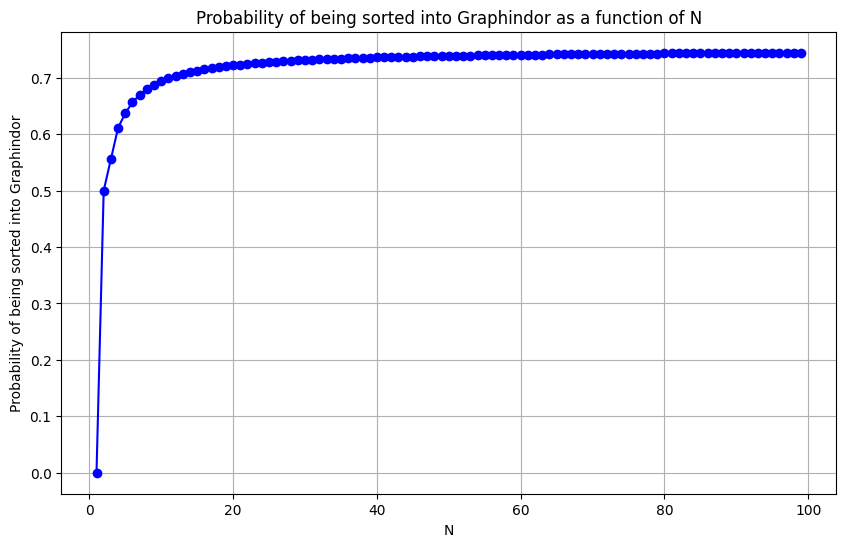

In [215]:
import matplotlib.pyplot as plt

# Define the range of N values
N_values = range(1, 100)

# Calculate the probabilities for each N
probabilities = [probability_graphindor_simple(N) for N in N_values]

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(N_values, probabilities, marker='o', linestyle='-', color='b')
plt.xlabel('N')
plt.ylabel('Probability of being sorted into Graphindor')
plt.title('Probability of being sorted into Graphindor as a function of N')
plt.grid(True)
plt.show()

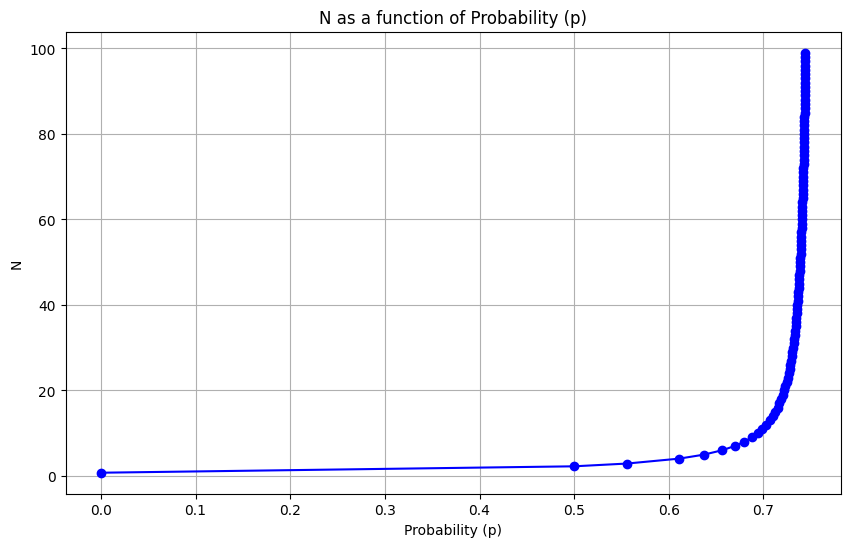

In [216]:
# Define the range of N values
N_values = range(1, 100)

# Calculate the probabilities for each N
probabilities = [probability_graphindor_simple(N) for N in N_values]

# Calculate the N values for each probability
N_values_computed = [N_given_probability_graphindor(p).evalf() for p in probabilities]

# Plot the N values
plt.figure(figsize=(10, 6))
plt.plot(probabilities, N_values_computed, marker='o', linestyle='-', color='b')
plt.xlabel('Probability (p)')
plt.ylabel('N')
plt.title('N as a function of Probability (p)')
plt.grid(True)
plt.show()